In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("アワビ/train.tsv", sep = "\t")
test = pd.read_csv("アワビ/test.tsv", sep = "\t")
df
#Sex=性別、Length=長さ、Dameter=直径、Height=高さ、Whole weight=全体の重量、Shucked weight=身の重量
#Viscera weight=内臓の重量、Shell weight=殻の重量、Rings=年齢

,id,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.2050,10
1,3,F,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.4900,11
2,7,F,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.3750,11
3,12,M,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.0800,10
4,16,I,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.0900,6
...,...,...,...,...,...,...,...,...,...,...
2083,4168,M,0.655,0.540,0.165,1.4030,0.6955,0.2385,0.4200,11
2084,4171,I,0.305,0.230,0.075,0.1455,0.0595,0.0305,0.0500,6
2085,4173,M,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.2850,19
2086,4174,I,0.435,0.345,0.115,0.4180,0.2220,0.0735,0.1060,7


In [10]:
print(df.isnull().sum())
print(test.isnull().sum())

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64


In [11]:
df.describe()

,id,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,2118.050766,0.521873,0.406557,0.139413,0.819116,0.355410,0.178227,0.237196,9.930077
std,1189.026152,0.121148,0.100285,0.044880,0.484888,0.218666,0.108274,0.139393,3.283578
min,0.000000,0.110000,0.090000,0.000000,0.008000,0.002500,0.002000,0.003000,2.000000
25%,1119.000000,0.450000,0.350000,0.115000,0.438875,0.184375,0.092000,0.130000,8.000000
50%,2142.500000,0.540000,0.420000,0.140000,0.791250,0.334000,0.168750,0.230250,9.000000
75%,3128.250000,0.610000,0.480000,0.165000,1.140125,0.497500,0.247500,0.325000,11.000000
max,4175.000000,0.780000,0.625000,1.130000,2.555000,1.245500,0.574500,1.005000,29.000000


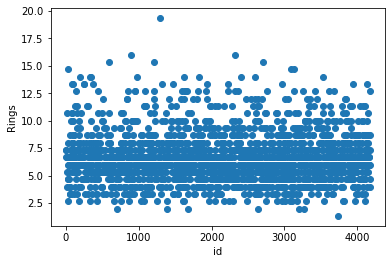

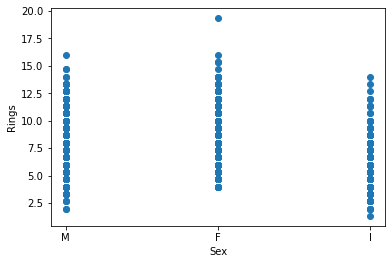

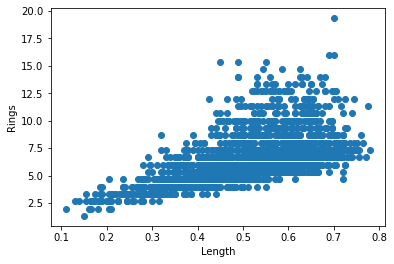

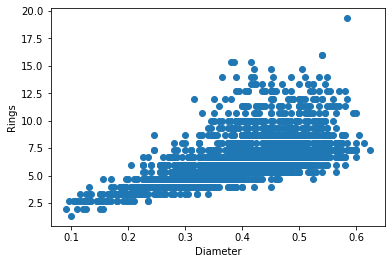

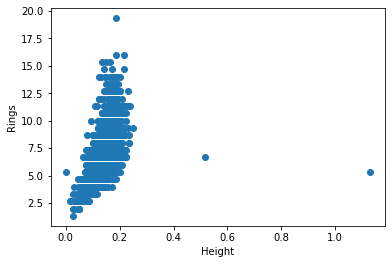

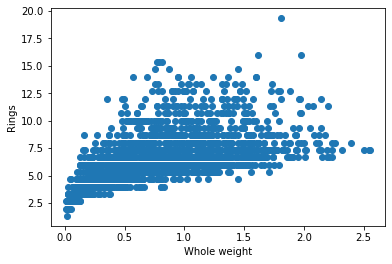

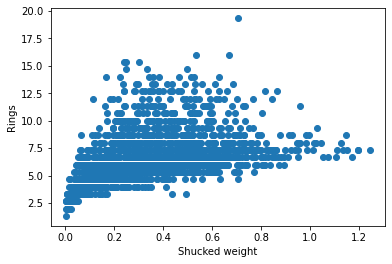

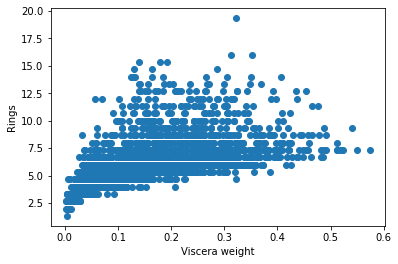

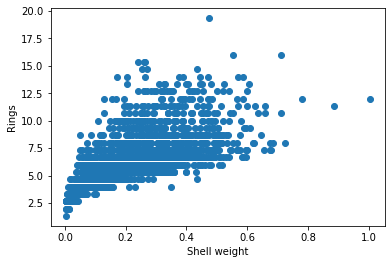

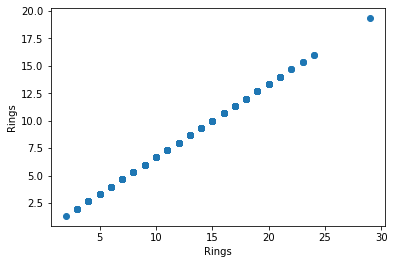

In [71]:
for n in df.columns:
    plt.scatter(df[n], df["Rings"])
    plt.xlabel(n)
    plt.ylabel("Rings")
    plt.show()
#Heightに外れ値がある、それ以外はそれなりに相関はありそう

In [17]:
df2 = df.drop(df[(df["Height"] > 0.4)].index, axis = 0)
df2

,id,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.2050,10
1,3,F,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.4900,11
2,7,F,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.3750,11
3,12,M,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.0800,10
4,16,I,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.0900,6
...,...,...,...,...,...,...,...,...,...,...
2083,4168,M,0.655,0.540,0.165,1.4030,0.6955,0.2385,0.4200,11
2084,4171,I,0.305,0.230,0.075,0.1455,0.0595,0.0305,0.0500,6
2085,4173,M,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.2850,19
2086,4174,I,0.435,0.345,0.115,0.4180,0.2220,0.0735,0.1060,7


In [25]:
ohe = pd.get_dummies(df2["Sex"], drop_first = True)
df3 = pd.concat([df2, ohe], axis = 1)
df4 = df3.drop(columns = "Sex")
df4

,id,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,I,M
0,0,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.2050,10,0,1
1,3,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.4900,11,0,0
2,7,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.3750,11,0,0
3,12,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.0800,10,0,1
4,16,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.0900,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2083,4168,0.655,0.540,0.165,1.4030,0.6955,0.2385,0.4200,11,0,1
2084,4171,0.305,0.230,0.075,0.1455,0.0595,0.0305,0.0500,6,1,0
2085,4173,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.2850,19,0,1
2086,4174,0.435,0.345,0.115,0.4180,0.2220,0.0735,0.1060,7,1,0


In [28]:
X = df4.drop(columns = ["Rings", "id"])
y = pd.Series(df4["Rings"], name = "y")
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,I,M
0,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.2050,0,1
1,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.4900,0,0
2,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.3750,0,0
3,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.0800,0,1
4,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.0900,1,0
...,...,...,...,...,...,...,...,...,...
2083,0.655,0.540,0.165,1.4030,0.6955,0.2385,0.4200,0,1
2084,0.305,0.230,0.075,0.1455,0.0595,0.0305,0.0500,1,0
2085,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.2850,0,1
2086,0.435,0.345,0.115,0.4180,0.2220,0.0735,0.1060,1,0


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

pipelines = {
    "gb1":GradientBoostingRegressor(max_depth = 3, n_estimators = 100, random_state = 0), 
    "gb2":GradientBoostingRegressor(max_depth = 3, n_estimators = 150, random_state = 0), 
    "gb3":GradientBoostingRegressor(max_depth = 4, n_estimators = 150, random_state = 0), 
    "rf1":RandomForestRegressor(max_depth = 3, n_estimators = 100, random_state = 0), 
    "rf2":RandomForestRegressor(max_depth = 3, n_estimators = 150, random_state = 0), 
    "lr":Pipeline([("scl", StandardScaler()), ("lr", LinearRegression())]),
    "rg":Pipeline([("scl", StandardScaler()), ("rg", Ridge(alpha = 0.01))]), 
    "ls":Pipeline([("scl", StandardScaler()), ("ls", Lasso(alpha = 0.01))]), 
    "en":Pipeline([("scl", StandardScaler()), ("en", ElasticNet(alpha = 0.01))]), 
    "tree":DecisionTreeRegressor(max_depth = 3, random_state = 0)
}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    
print("学習完了")

学習完了


In [92]:
from sklearn.metrics import r2_score

scores = {}
for pipe_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    scores[(pipe_name,'train')] = r2_score(y_train, pipeline.predict(X_train))
    scores[(pipe_name,'test')] = r2_score(y_test, pipeline.predict(X_test))

pd.Series(scores).unstack()

,test,train
en,0.523468,0.524696
gb1,0.557112,0.698651
gb2,0.555878,0.740156
gb3,0.550193,0.841301
lr,0.525774,0.528648
ls,0.525296,0.526534
rf1,0.494200,0.495278
rf2,0.494960,0.494679
rg,0.525775,0.528648
tree,0.429164,0.429231


In [55]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

selector = RFE(estimator=RandomForestClassifier(n_estimators=100,random_state=0),n_features_to_select=5,step=.05)
selector.fit(X, y)
selector.support_

array([False,  True, False,  True,  True,  True,  True, False, False])

In [56]:
X_selected=selector.transform(X)
X_selected=pd.DataFrame(X_selected,columns=X.columns[selector.support_])
X_selected

,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.435,0.6990,0.2880,0.1595,0.2050
1,0.565,1.8170,0.7850,0.4920,0.4900
2,0.520,1.3540,0.4845,0.3510,0.3750
3,0.280,0.2225,0.0875,0.0430,0.0800
4,0.330,0.3595,0.1700,0.0810,0.0900
...,...,...,...,...,...
2081,0.540,1.4030,0.6955,0.2385,0.4200
2082,0.230,0.1455,0.0595,0.0305,0.0500
2083,0.395,0.7820,0.2850,0.1405,0.2850
2084,0.345,0.4180,0.2220,0.0735,0.1060


In [83]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 0)

pipelines = {
    "gb1":GradientBoostingRegressor(max_depth = 3, n_estimators = 100, random_state = 0), 
    "gb2":GradientBoostingRegressor(max_depth = 3, n_estimators = 150, random_state = 0), 
    "gb3":GradientBoostingRegressor(max_depth = 4, n_estimators = 150, random_state = 0), 
    "rf1":RandomForestRegressor(max_depth = 3, n_estimators = 100, random_state = 0), 
    "rf2":RandomForestRegressor(max_depth = 3, n_estimators = 150, random_state = 0), 
    "lr":Pipeline([("scl", StandardScaler()), ("lr", LinearRegression())]),
    "rg":Pipeline([("scl", StandardScaler()), ("rg", Ridge(alpha = 0.01))]), 
    "ls":Pipeline([("scl", StandardScaler()), ("ls", Lasso(alpha = 0.01))]), 
    "en":Pipeline([("scl", StandardScaler()), ("en", ElasticNet(alpha = 0.01))])
}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    
print("学習完了")

学習完了


In [84]:
scores = {}
for pipe_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    scores[(pipe_name,'train')] = r2_score(y_train, pipeline.predict(X_train))
    scores[(pipe_name,'test')] = r2_score(y_test, pipeline.predict(X_test))

pd.Series(scores).unstack()

,test,train
en,0.520573,0.498828
gb1,0.556558,0.681640
gb2,0.562280,0.729055
gb3,0.542790,0.821437
lr,0.523592,0.502950
ls,0.522122,0.500889
rf1,0.493940,0.489816
rf2,0.494286,0.488992
rg,0.523593,0.502950
